# Python データビジュアライゼーション入門

## Ch.05 さまざまなグラフ・チャートによるビジュアライゼーション

- Sec.14 折れ線グラフ
- Sec.15 ヒートマップ
- Sec.16 ウォーターフォールチャート
- Sec.17 ツリーマップ
- Sec.18 サンバーストチャート
- Sec.19 レーダーチャート

In [5]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
import plotly.subplots
import seaborn as sns
import squarify
from IPython.display import display
from matplotlib import rcParams

rcParams['font.family'] = 'IPAexgothic'

### Sec.14 折れ線グラフ

- weather_sample.csv
  - 日本の各都市の1年分の気象データ

list 5.59 日本の各都市の平均気温の1年分のデータ

In [6]:
weather = pd.read_csv("../support/weather_sample.csv", header=0, parse_dates=["年月"])
print(weather.shape)
display(weather.head())
display(weather.tail())

(48, 13)


,年月,東京-平均気温(℃),東京-降水量の合計(mm),東京-日照時間(時間),大阪-平均気温(℃),大阪-降水量の合計(mm),大阪-日照時間(時間),那覇-平均気温(℃),那覇-降水量の合計(mm),那覇-日照時間(時間),函館-平均気温(℃),函館-降水量の合計(mm),函館-日照時間(時間)
0,2015-01-01,5.8,92.5,182.0,6.1,93.0,123.3,16.6,22.0,90.7,-0.9,43.0,108.2
1,2015-02-01,5.7,62.0,166.9,6.9,25.5,136.8,16.8,47.0,114.1,0.1,52.5,129.4
2,2015-03-01,10.3,94.0,194.2,10.2,174.5,175.4,19.0,95.5,126.5,4.3,100.0,160.0
3,2015-04-01,14.5,129.0,149.5,15.9,107.0,152.1,22.2,100.0,118.9,8.3,133.5,227.5
4,2015-05-01,21.1,88.0,240.6,21.5,104.0,249.3,24.9,197.5,144.2,13.2,74.5,251.4


,年月,東京-平均気温(℃),東京-降水量の合計(mm),東京-日照時間(時間),大阪-平均気温(℃),大阪-降水量の合計(mm),大阪-日照時間(時間),那覇-平均気温(℃),那覇-降水量の合計(mm),那覇-日照時間(時間),函館-平均気温(℃),函館-降水量の合計(mm),函館-日照時間(時間)
43,2018-08-01,28.1,86.5,217.4,29.7,41.5,260.7,28.5,310.0,203.4,21.3,243.5,103.9
44,2018-09-01,22.9,365.0,96.7,24.1,372.0,91.7,28.4,334.5,174.6,18.7,156.0,158.3
45,2018-10-01,19.1,61.5,139.0,19.7,24.0,198.7,23.9,375.0,151.8,13.9,191.5,198.0
46,2018-11-01,14.0,63.0,151.0,14.6,30.5,161.9,23.1,160.5,155.9,7.2,53.0,154.0
47,2018-12-01,8.3,44.0,145.3,9.4,72.0,133.3,20.4,148.0,85.3,-0.3,91.5,87.1


#### 折れ線グラフを描画する

- [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

list5.60 折れ線グラフの描画例1

<AxesSubplot: xlabel='年月', ylabel='東京-平均気温(℃)'>

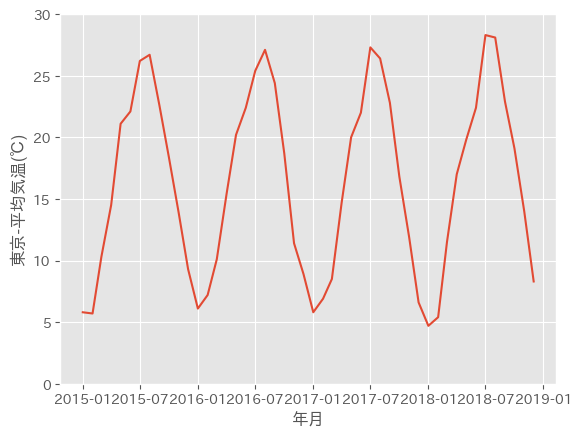

In [7]:
plt.style.use('ggplot')

# デフォルトでは軸の最小が「0」にならないためy軸を指定する
plt.ylim([0, 30])

sns.lineplot(data=weather, x="年月", y="東京-平均気温(℃)")

list5.61 折れ線グラフの描画例2

(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01')])

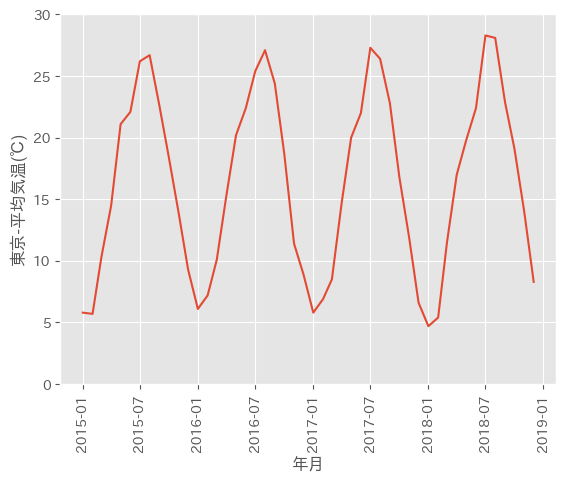

In [8]:
# plt.xticks(rotation=90): 横軸の目盛りを縦にする
plt.ylim([0, 30])
sns.lineplot(data=weather, x="年月", y="東京-平均気温(℃)")
plt.xticks(rotation=90)

#### 複数の折れ線グラフを1つのグラフ内に描画する

list5.62 東京、大阪、那覇、函館の平均気温のデータ

In [9]:
# index_col=0: 最初のカラム（年月）をインデックスにする
weather_index = pd.read_csv(
    "../support/weather_sample.csv", header=0,
    parse_dates=["年月"], index_col=0
)
display(weather_index.head())

,東京-平均気温(℃),東京-降水量の合計(mm),東京-日照時間(時間),大阪-平均気温(℃),大阪-降水量の合計(mm),大阪-日照時間(時間),那覇-平均気温(℃),那覇-降水量の合計(mm),那覇-日照時間(時間),函館-平均気温(℃),函館-降水量の合計(mm),函館-日照時間(時間)
年月,,,,,,,,,,,,
2015-01-01,5.8,92.5,182.0,6.1,93.0,123.3,16.6,22.0,90.7,-0.9,43.0,108.2
2015-02-01,5.7,62.0,166.9,6.9,25.5,136.8,16.8,47.0,114.1,0.1,52.5,129.4
2015-03-01,10.3,94.0,194.2,10.2,174.5,175.4,19.0,95.5,126.5,4.3,100.0,160.0
2015-04-01,14.5,129.0,149.5,15.9,107.0,152.1,22.2,100.0,118.9,8.3,133.5,227.5
2015-05-01,21.1,88.0,240.6,21.5,104.0,249.3,24.9,197.5,144.2,13.2,74.5,251.4


In [10]:
tmp_ave = weather_index[[
    "東京-平均気温(℃)", "大阪-平均気温(℃)", "那覇-平均気温(℃)", "函館-平均気温(℃)"
]]
display(tmp_ave.head())

,東京-平均気温(℃),大阪-平均気温(℃),那覇-平均気温(℃),函館-平均気温(℃)
年月,,,,
2015-01-01,5.8,6.1,16.6,-0.9
2015-02-01,5.7,6.9,16.8,0.1
2015-03-01,10.3,10.2,19.0,4.3
2015-04-01,14.5,15.9,22.2,8.3
2015-05-01,21.1,21.5,24.9,13.2


list5.63 複数の折れ線グラフを1つのグラフ内に描画する例

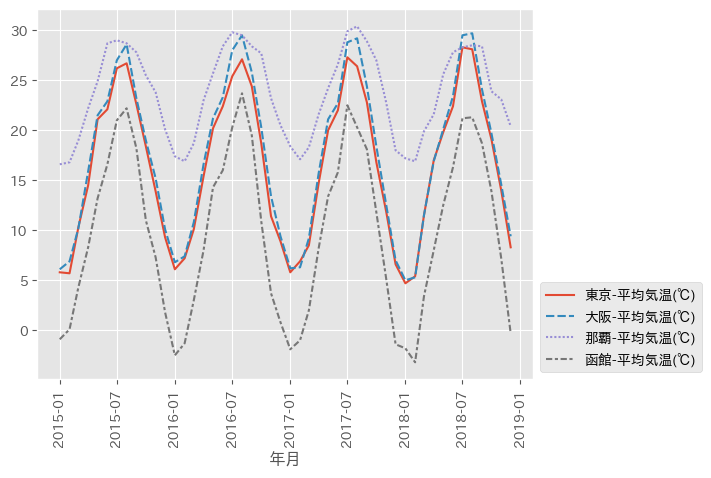

In [11]:
# 折れ線グラフの描画
ax = sns.lineplot(data=tmp_ave)

# ラベルと凡例を適正にする
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

#### 複数の折れ線グラフの線種を同じにする

In [12]:
tmp_ave.head()

,東京-平均気温(℃),大阪-平均気温(℃),那覇-平均気温(℃),函館-平均気温(℃)
年月,,,,
2015-01-01,5.8,6.1,16.6,-0.9
2015-02-01,5.7,6.9,16.8,0.1
2015-03-01,10.3,10.2,19.0,4.3
2015-04-01,14.5,15.9,22.2,8.3
2015-05-01,21.1,21.5,24.9,13.2


In [13]:
tmp_ave.stack()

年月                    
2015-01-01  東京-平均気温(℃)     5.8
            大阪-平均気温(℃)     6.1
            那覇-平均気温(℃)    16.6
            函館-平均気温(℃)    -0.9
2015-02-01  東京-平均気温(℃)     5.7
                          ... 
2018-11-01  函館-平均気温(℃)     7.2
2018-12-01  東京-平均気温(℃)     8.3
            大阪-平均気温(℃)     9.4
            那覇-平均気温(℃)    20.4
            函館-平均気温(℃)    -0.3
Length: 192, dtype: float64

In [14]:
tmp_ave.stack().rename_axis(["年月", "category"])

年月          category  
2015-01-01  東京-平均気温(℃)     5.8
            大阪-平均気温(℃)     6.1
            那覇-平均気温(℃)    16.6
            函館-平均気温(℃)    -0.9
2015-02-01  東京-平均気温(℃)     5.7
                          ... 
2018-11-01  函館-平均気温(℃)     7.2
2018-12-01  東京-平均気温(℃)     8.3
            大阪-平均気温(℃)     9.4
            那覇-平均気温(℃)    20.4
            函館-平均気温(℃)    -0.3
Length: 192, dtype: float64

In [15]:
tmp_ave.stack().rename_axis(["年月", "category"]).reset_index()

,年月,category,0
0,2015-01-01,東京-平均気温(℃),5.8
1,2015-01-01,大阪-平均気温(℃),6.1
2,2015-01-01,那覇-平均気温(℃),16.6
3,2015-01-01,函館-平均気温(℃),-0.9
4,2015-02-01,東京-平均気温(℃),5.7
...,...,...,...
187,2018-11-01,函館-平均気温(℃),7.2
188,2018-12-01,東京-平均気温(℃),8.3
189,2018-12-01,大阪-平均気温(℃),9.4
190,2018-12-01,那覇-平均気温(℃),20.4


In [16]:
tmp_ave.stack().rename_axis(["年月", "category"]).reset_index().rename(columns={0: "value"})

,年月,category,value
0,2015-01-01,東京-平均気温(℃),5.8
1,2015-01-01,大阪-平均気温(℃),6.1
2,2015-01-01,那覇-平均気温(℃),16.6
3,2015-01-01,函館-平均気温(℃),-0.9
4,2015-02-01,東京-平均気温(℃),5.7
...,...,...,...
187,2018-11-01,函館-平均気温(℃),7.2
188,2018-12-01,東京-平均気温(℃),8.3
189,2018-12-01,大阪-平均気温(℃),9.4
190,2018-12-01,那覇-平均気温(℃),20.4


list5.64 複数の折れ線グラフの線種を同じにする例

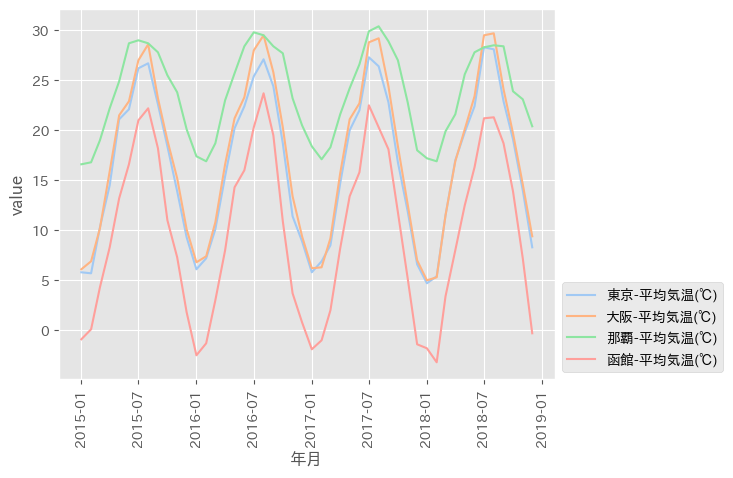

In [17]:
# データ整形
tmp_stack = tmp_ave\
    .stack()\
    .rename_axis(["年月", "category"])\
    .reset_index()\
    .rename(columns={0: "value"})

# 折れ線グラフを描画
ax = sns.lineplot(
    data=tmp_stack, x="年月", y="value",
    hue="category", palette="pastel"
)
# ラベルと凡例を適正にする
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

#### 折れ線グラフのうち1つを強調する

list5.65 特定の折れ線グラフを強調した描画例

,年月,category,value
0,2015-01-01,東京-平均気温(℃),5.8
1,2015-01-01,大阪-平均気温(℃),6.1
2,2015-01-01,那覇-平均気温(℃),16.6
3,2015-01-01,函館-平均気温(℃),-0.9
4,2015-02-01,東京-平均気温(℃),5.7
...,...,...,...
187,2018-11-01,函館-平均気温(℃),7.2
188,2018-12-01,東京-平均気温(℃),8.3
189,2018-12-01,大阪-平均気温(℃),9.4
190,2018-12-01,那覇-平均気温(℃),20.4


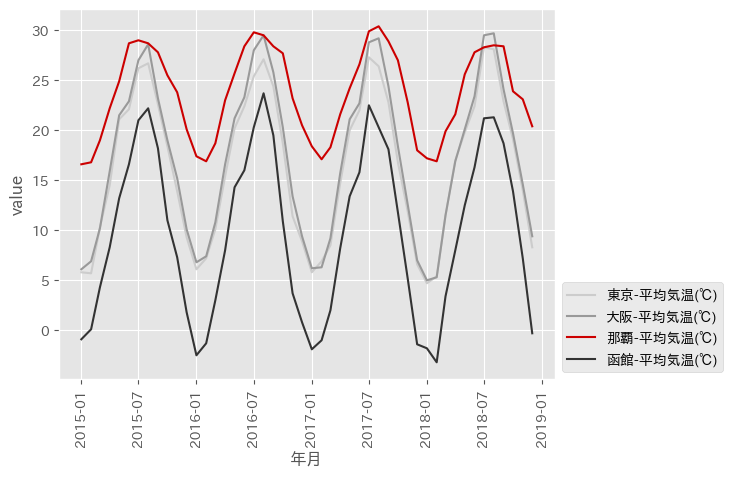

In [18]:
# データ整形
tmp_stack = tmp_ave\
    .stack()\
    .rename_axis(["年月", "category"])\
    .reset_index()\
    .rename(columns={0: "value"})
display(tmp_stack)

# カテゴリ数を数える
num_category = len(tmp_stack["category"].unique())
# 強調色
point_color = "#CC0000"
# 強調したいカテゴリの番号
point_number = 2
# もとになるパレットの作成
palette = sns.color_palette("gray_r", n_colors=num_category)
# パレットの一部の色を変更する
palette[point_number] = point_color

# 折れ線グラフを描画
ax = sns.lineplot(
    data=tmp_stack, x="年月", y="value",
    hue="category", palette=palette,
)
# ラベルと凡例を適正にする
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

#### plotlyで複数の折れ線グラフを描画する

list5.67 plotlyを利用した複数の折れ線グラフの描画例

In [20]:
# go.Scatter関数の引数modeにlinesを指定する

tmp_tokyo = go.Scatter(
    x=weather["年月"], y=weather["東京-平均気温(℃)"],
    mode="lines", name="東京"
)
tmp_osaka = go.Scatter(
    x=weather["年月"], y=weather["大阪-平均気温(℃)"],
    mode="lines", name="大阪"
)
tmp_naha = go.Scatter(
    x=weather["年月"], y=weather["那覇-平均気温(℃)"],
    mode="lines", name="那覇"
)
tmp_hakodate = go.Scatter(
    x=weather["年月"], y=weather["函館-平均気温(℃)"],
    mode="lines", name="函館"
)

# レイアウトの指定
layout = go.Layout(
    xaxis=dict(
        title="各都市の平均気温",
        type="date",
        dtick="M1"  # 1か月ごとにラベルを表示
    ),
    yaxis=dict(title="気温")
)

fig = go.Figure(
    data=[tmp_tokyo, tmp_osaka, tmp_naha, tmp_hakodate],
    layout=layout
)
fig.show()

In [23]:
# Line Plots with column encoding color

df = px.data.gapminder().query("continent=='Oceania'")
display(df)
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [24]:
# plotly.expressを利用した複数の折れ線グラフの描画

display(tmp_ave.head())
# データ整形
tmp_stack = tmp_ave\
    .stack()\
    .rename_axis(["年月", "category"])\
    .reset_index()\
    .rename(columns={0: "value"})
display(tmp_stack)

fig = px.line(tmp_stack, x="年月", y="value", color="category")
fig.show()

,東京-平均気温(℃),大阪-平均気温(℃),那覇-平均気温(℃),函館-平均気温(℃)
年月,,,,
2015-01-01,5.8,6.1,16.6,-0.9
2015-02-01,5.7,6.9,16.8,0.1
2015-03-01,10.3,10.2,19.0,4.3
2015-04-01,14.5,15.9,22.2,8.3
2015-05-01,21.1,21.5,24.9,13.2


,年月,category,value
0,2015-01-01,東京-平均気温(℃),5.8
1,2015-01-01,大阪-平均気温(℃),6.1
2,2015-01-01,那覇-平均気温(℃),16.6
3,2015-01-01,函館-平均気温(℃),-0.9
4,2015-02-01,東京-平均気温(℃),5.7
...,...,...,...
187,2018-11-01,函館-平均気温(℃),7.2
188,2018-12-01,東京-平均気温(℃),8.3
189,2018-12-01,大阪-平均気温(℃),9.4
190,2018-12-01,那覇-平均気温(℃),20.4
